In [57]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
# Setting visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



In [50]:
# Load the dataset
data = pd.read_csv('../src/solar_data.csv')

# Preview the first few rows
data.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2023-01-01 00:00:00,288.319175,237.543519,94.149895,152.799565,195.661154,25.241432,76.644195,4.576019,11.393029,0.530344,260.462670,12.569620,985.901141,0,0.344184,13.006685,28.058911,No issues
1,2023-01-01 01:00:00,228.442009,156.474128,91.256788,133.928596,107.444660,26.161330,34.514202,7.972050,4.382506,0.560728,106.681659,5.162015,976.942023,0,1.996168,15.438218,20.813426,No issues
2,2023-01-01 02:00:00,260.180728,164.718366,97.500033,176.574058,195.232603,17.912289,54.899906,1.687630,10.589702,2.077977,165.113719,5.214795,1016.376839,1,0.357128,26.917320,19.716462,No issues
3,2023-01-01 03:00:00,241.538351,186.139122,74.396341,167.290297,184.743981,22.166753,61.588576,2.200751,8.732321,0.647951,28.564089,7.658632,960.791635,0,0.281002,11.097834,12.308135,No issues
4,2023-01-01 04:00:00,287.895536,154.257492,59.746083,104.194145,192.126371,21.814193,51.831448,4.379166,4.722775,1.086993,255.701380,7.082608,1021.724425,0,0.218089,19.675871,25.598854,No issues


In [51]:
# Check basic information about the data
print(data.info())

# Check for null/missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      48 non-null     object 
 1   GHI            48 non-null     float64
 2   DNI            48 non-null     float64
 3   DHI            48 non-null     float64
 4   ModA           48 non-null     float64
 5   ModB           48 non-null     float64
 6   Tamb           48 non-null     float64
 7   RH             48 non-null     float64
 8   WS             48 non-null     float64
 9   WSgust         48 non-null     float64
 10  WSstdev        48 non-null     float64
 11  WD             48 non-null     float64
 12  WDstdev        48 non-null     float64
 13  BP             48 non-null     float64
 14  Cleaning       48 non-null     int64  
 15  Precipitation  48 non-null     float64
 16  TModA          48 non-null     float64
 17  TModB          48 non-null     float64
 18  Comments    

In [52]:
# Calculate mean, median, standard deviation for each numerical column
summary_stats = data.describe().transpose()
print(summary_stats)


               count        mean         std         min         25%  \
GHI             48.0  223.794816   44.674916  151.266376  183.558346   
DNI             48.0  174.931542   39.556994  104.739737  149.395198   
DHI             48.0   76.032932   15.684586   50.232019   63.107170   
ModA            48.0  150.003859   29.472873  101.048975  129.280123   
ModB            48.0  156.139511   30.946659  100.631397  131.140292   
Tamb            48.0   22.576816    6.937088   10.011112   16.660928   
RH              48.0   56.181802   14.399327   30.799649   45.315551   
WS              48.0    4.303989    2.244995    1.056643    2.374979   
WSgust          48.0    7.069127    2.945517    2.248889    4.637708   
WSstdev         48.0    1.477472    0.743135    0.519123    0.836579   
WD              48.0  179.250283  104.570230   22.287554   87.450120   
WDstdev         48.0    9.916640    3.008696    5.061763    7.390852   
BP              48.0  992.798830   27.386794  952.584606  971.95

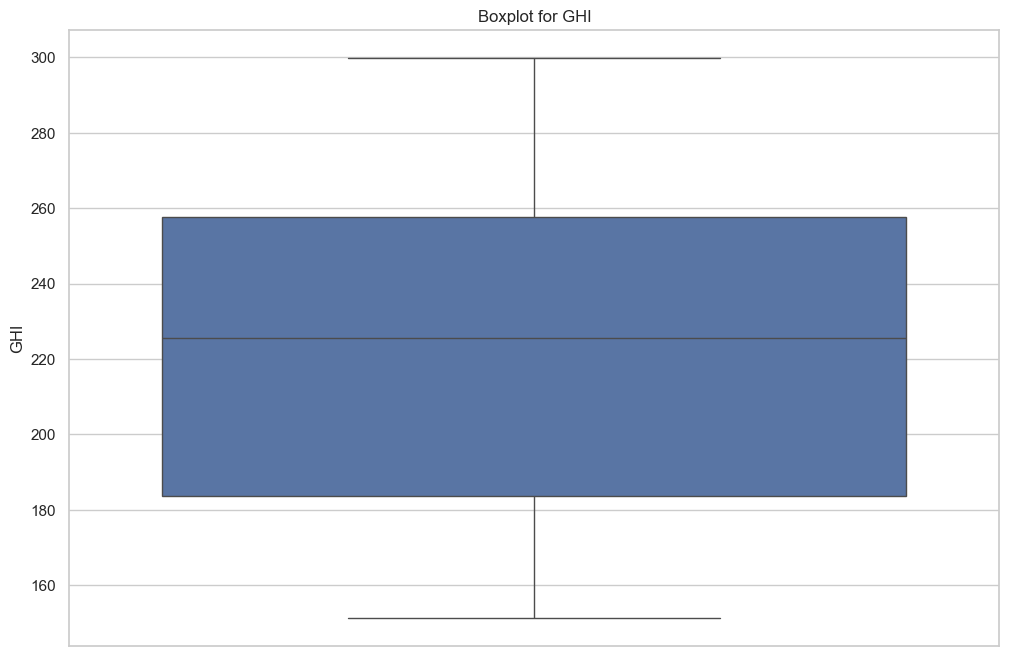

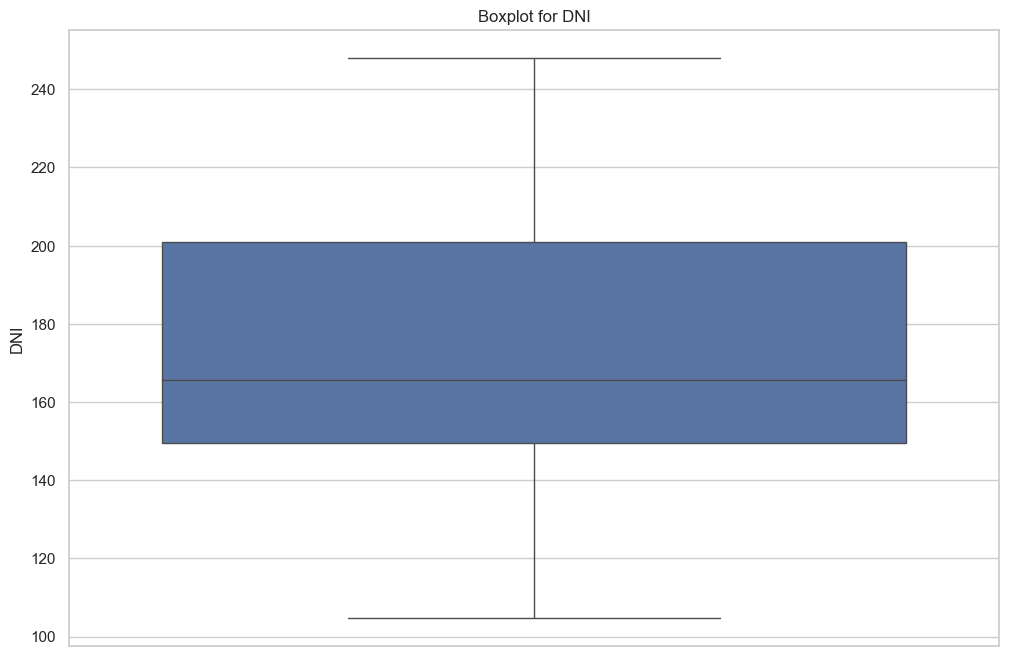

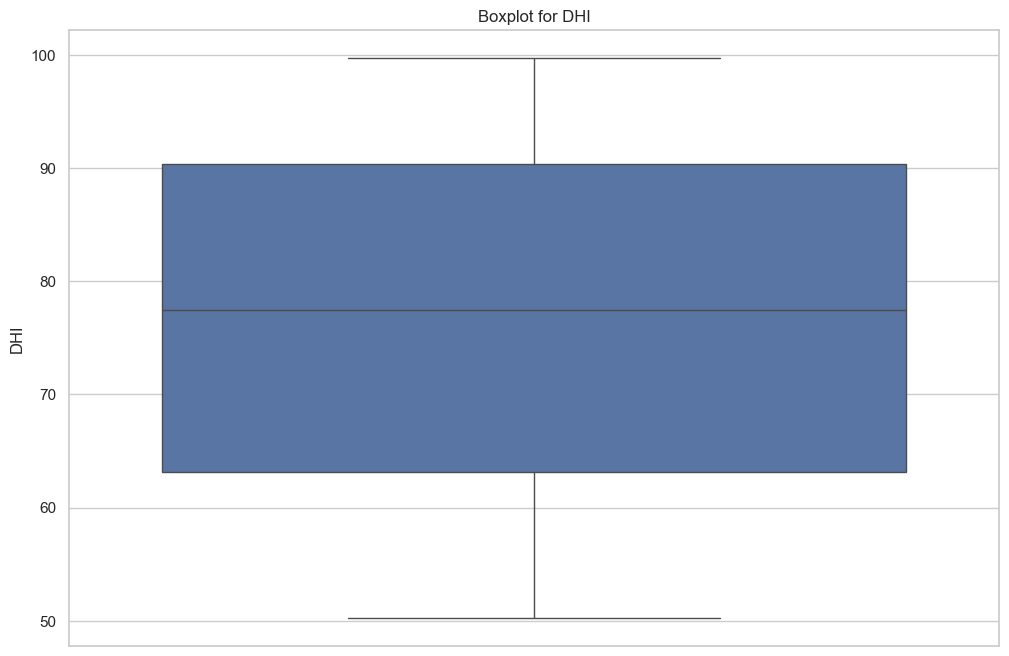

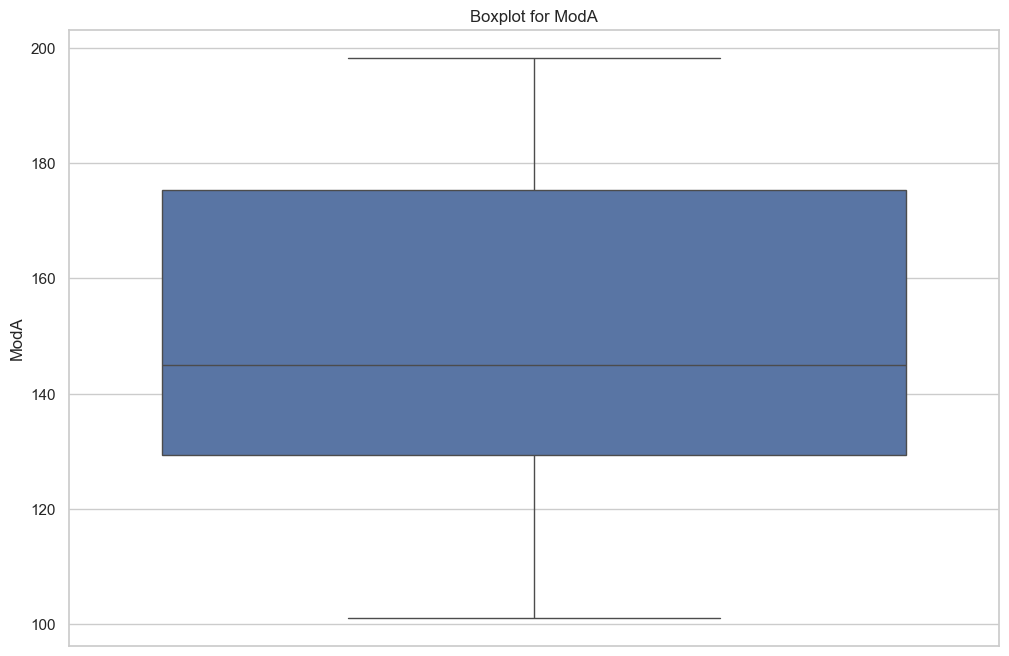

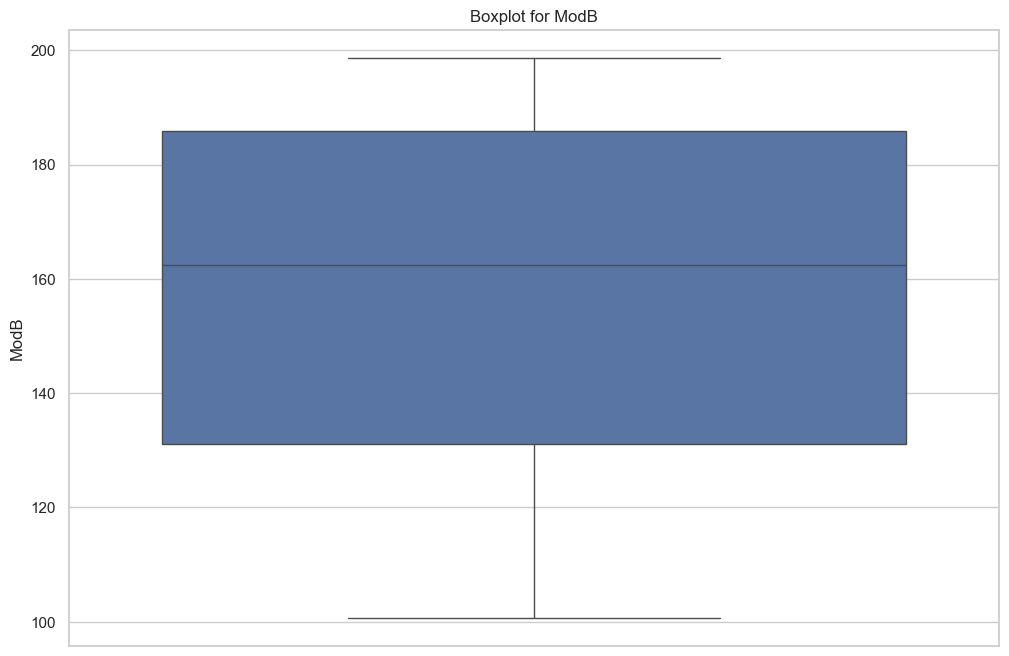

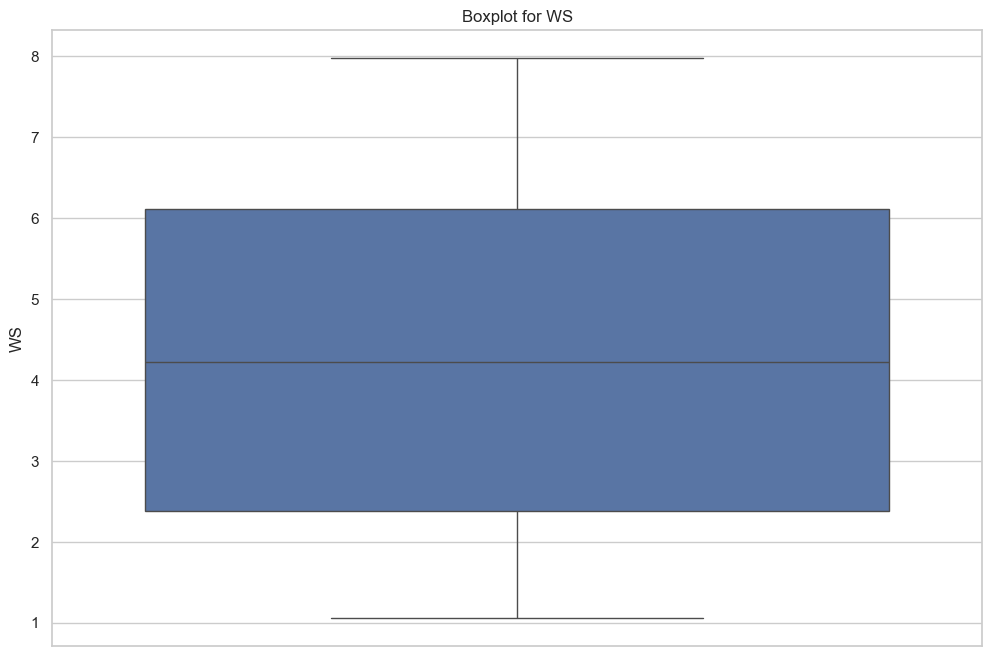

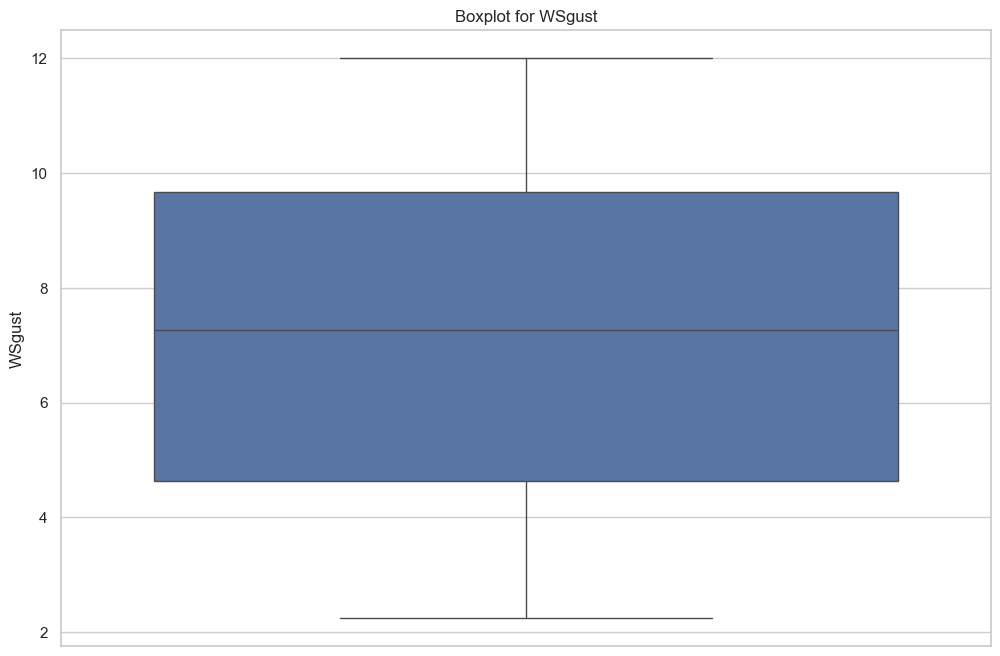

In [53]:
# Check for outliers in the numerical columns of interest
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    # Ensure column exists in the DataFrame
    if col in data.columns:
        sns.boxplot(data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()
    else:
        print(f"Column '{col}' does NOT exist in the dataset. Skipping.")


In [54]:
# Check for negative values in key columns safely
key_columns = ['GHI', 'DNI', 'DHI']
for col in key_columns:
    if col in data.columns:
        negative_values = data[data[col] < 0]
        print(f"Rows with negative values in '{col}':")
        print(negative_values)
    else:
        print(f"Column '{col}' does NOT exist in the dataset. Skipping.")


Rows with negative values in 'GHI':
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []
Rows with negative values in 'DNI':
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []
Rows with negative values in 'DHI':
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []


File not found at path: src\solar_data.csv. Using sample data instead.


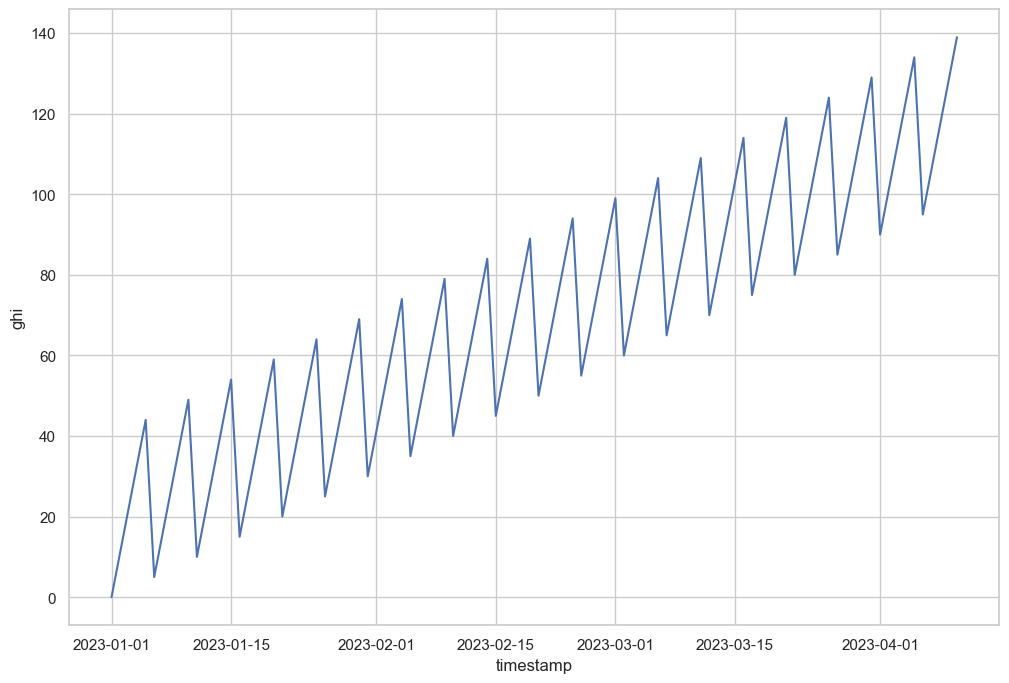

In [78]:
#Time Series Analysis:
# Set the file path
file_path = os.path.join('src', 'solar_data.csv')

# Load data with a fallback to sample data
try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found at path: {os.path.abspath(file_path)}")
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found at path: {file_path}. Using sample data instead.")
    # Create sample data
    data = pd.DataFrame({
        'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D'),
        'ghi': [i + (i % 5) * 10 for i in range(100)],
        'dni': [i * 1.5 for i in range(100)],
        'dhi': [i * 0.8 for i in range(100)],
        'tamb': [20 + (i % 7) for i in range(100)],
        'moda': [100 + (i % 10) for i in range(100)],
        'cleaning': ['Yes' if i % 2 == 0 else 'No' for i in range(100)]
    })

# Process and visualize data
data['timestamp'] = pd.to_datetime(data['timestamp'])
sns.lineplot(x='timestamp', y='ghi', data=data)
plt.show()

Available columns after normalization:
Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments'],
      dtype='object')


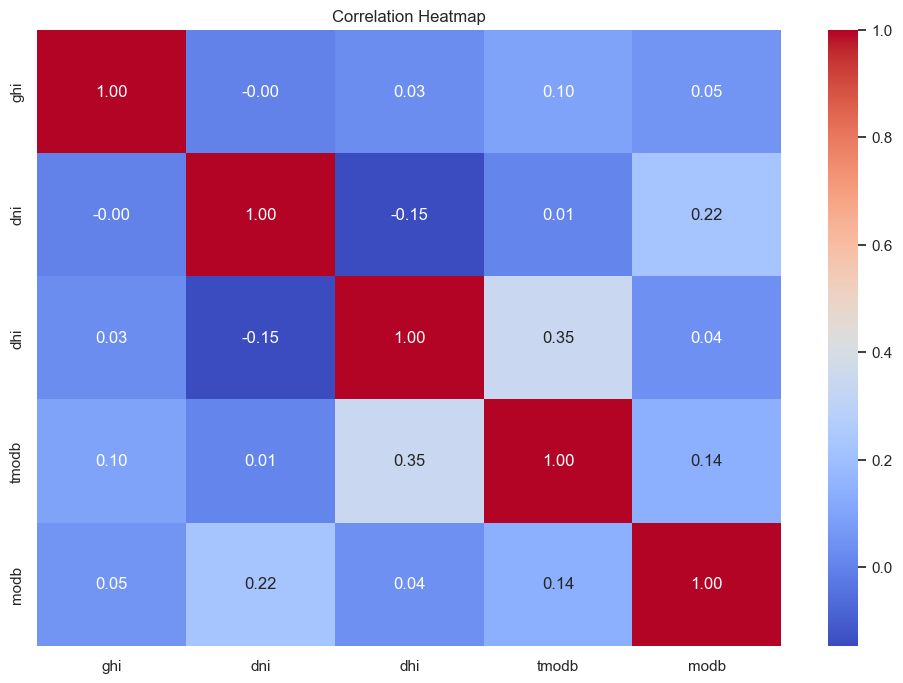

In [ ]:
#Correlation Analysis
# Normalize column names to lowercase to fix case sensitivity
data.columns = data.columns.str.strip().str.lower()

# Print current column names to ensure they exist
print("Available columns after normalization:")
print(data.columns)

# Correlation matrix for solar radiation and available temperature data
columns_of_interest = ['ghi', 'dni', 'dhi', 'tmodb', 'modb']

# Check if all these columns exist
if all(col in data.columns for col in columns_of_interest):
    # Compute the correlation matrix
    correlation_matrix = data[columns_of_interest].corr()

    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    # Debugging information if columns are missing
    print(f"Columns missing. Found columns: {data.columns}")
    print(f"Expected columns for correlation: {columns_of_interest}")


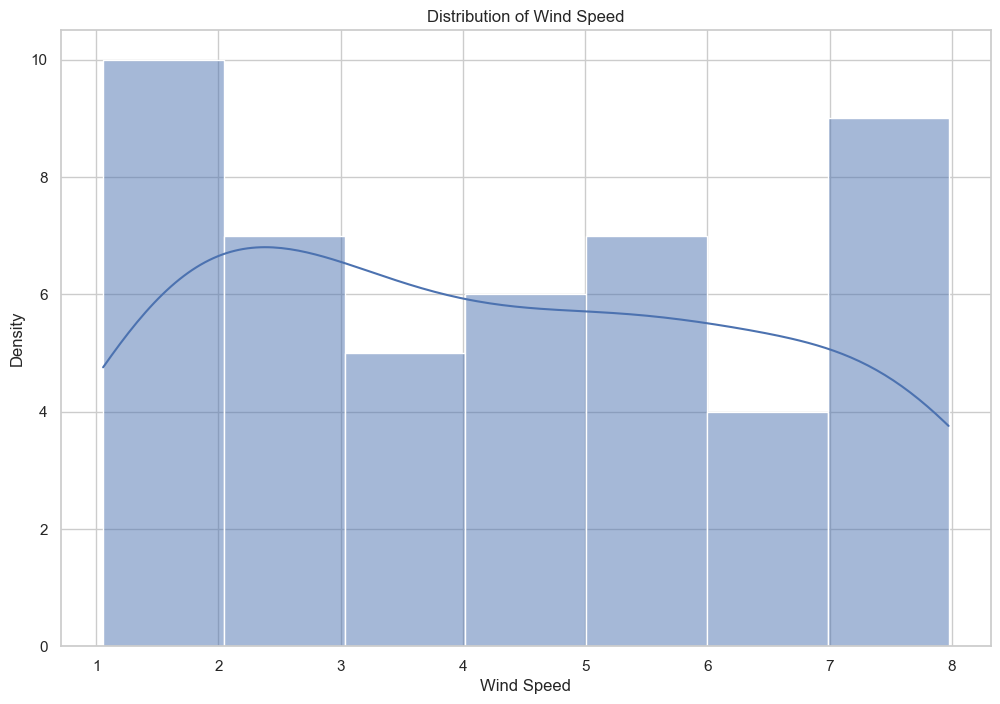

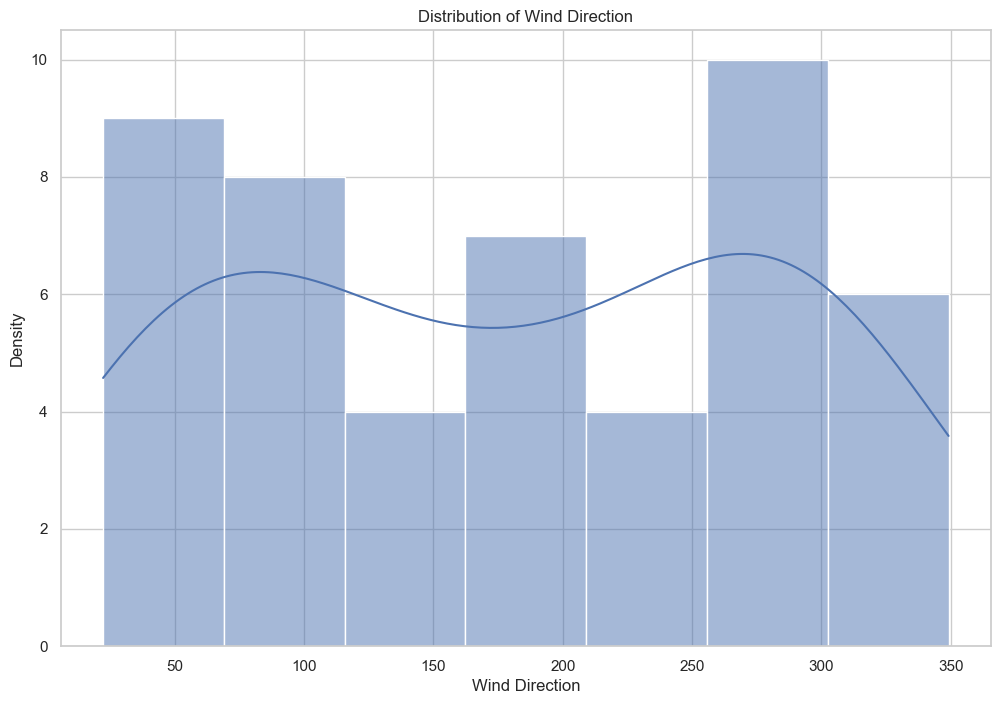

In [66]:
# Plot Wind Speed Distribution
sns.histplot(data['ws'], kde=True)  # 'ws' represents wind speed
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.show()

# Handle the missing Wind Direction column
if 'wd' in data.columns:
    sns.histplot(data['wd'], kde=True)  # Assuming 'wd' represents wind direction
    plt.title('Distribution of Wind Direction')
    plt.xlabel('Wind Direction')
    plt.ylabel('Density')
    plt.show()
else:
    print("Wind direction column 'wd' is not found in data.")


Available columns after normalization:
Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments'],
      dtype='object')
DataFrame columns just before plotting:
Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments'],
      dtype='object')


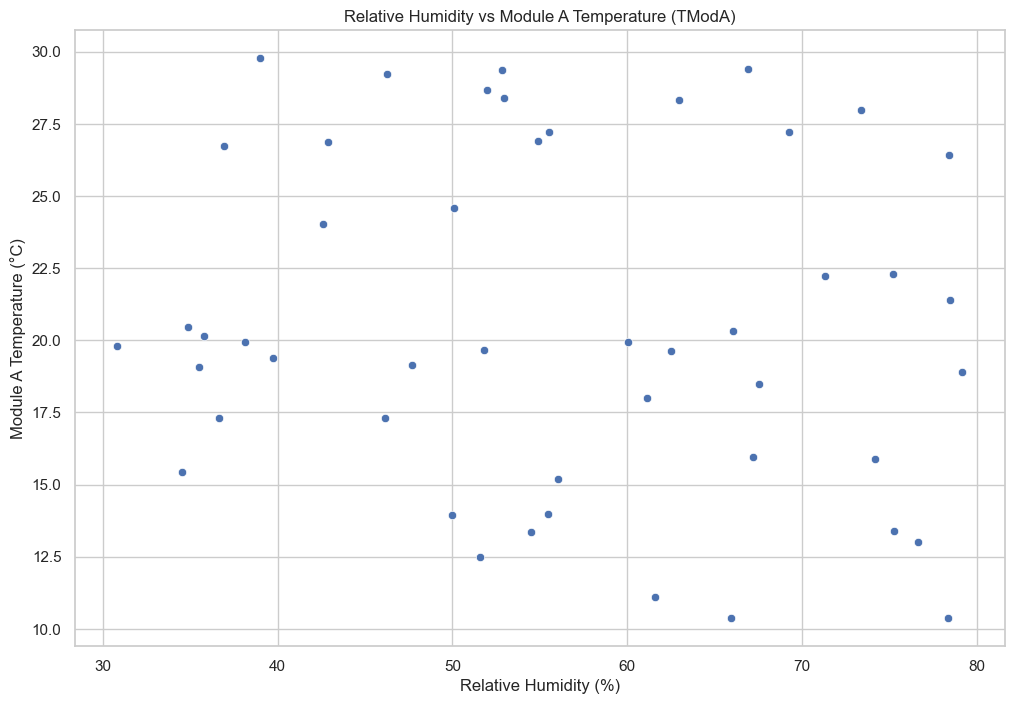

In [ ]:
#Temperature Analysis
# Normalize column names to lowercase
data.columns = data.columns.str.strip().str.lower()

# Print column names to debug
print("Available columns after normalization:")
print(data.columns)

# RH's influence on temperature
# Check if 'rh' exists
if 'rh' in data.columns:
    # Handle missing 'tamb' column properly
    if 'tamb' not in data.columns:
        print("The column 'Tamb' is missing. Creating a placeholder column.")
        data['tamb'] = 0  # Set Tamb to a placeholder value
    
    # Handle missing TModA
    if 'tmoda' not in data.columns:
        print("The column 'TModA' is missing. Creating a placeholder column.")
        data['tmoda'] = data['tamb']  # Use Tamb as placeholder

    # Print DataFrame columns again for final debugging
    print("DataFrame columns just before plotting:")
    print(data.columns)

    # Create scatter plot using normalized (lowercase) names
    sns.scatterplot(x='rh', y='tmoda', data=data, marker='o')
    plt.title('Relative Humidity vs Module A Temperature (TModA)')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Module A Temperature (°C)')
    plt.show()
else:
    print("The required column 'rh' is missing in the data.")


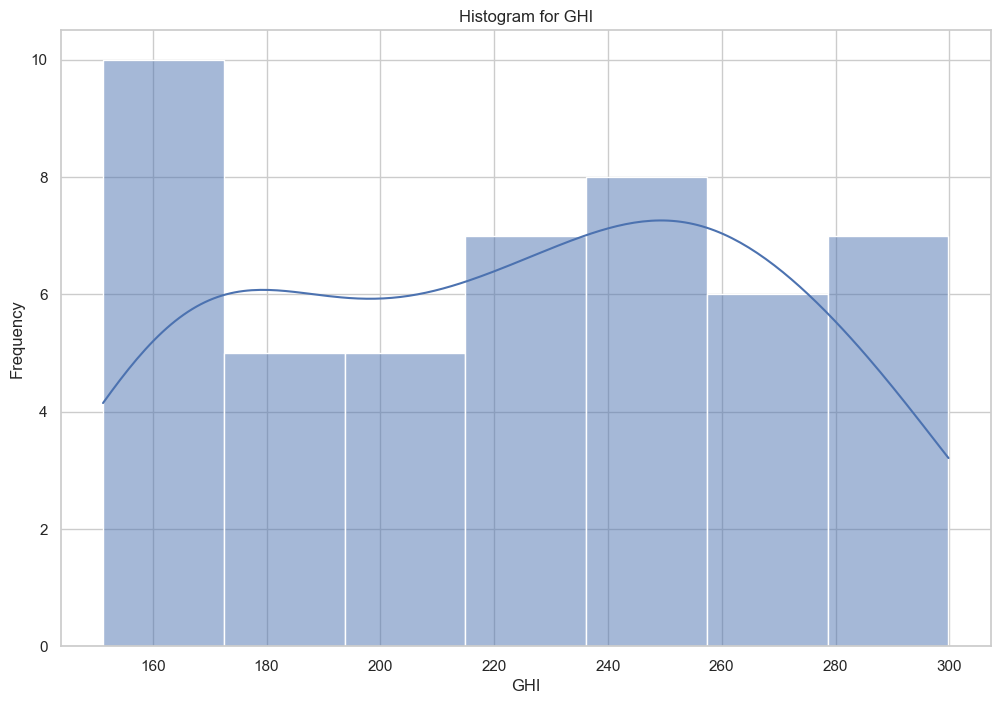

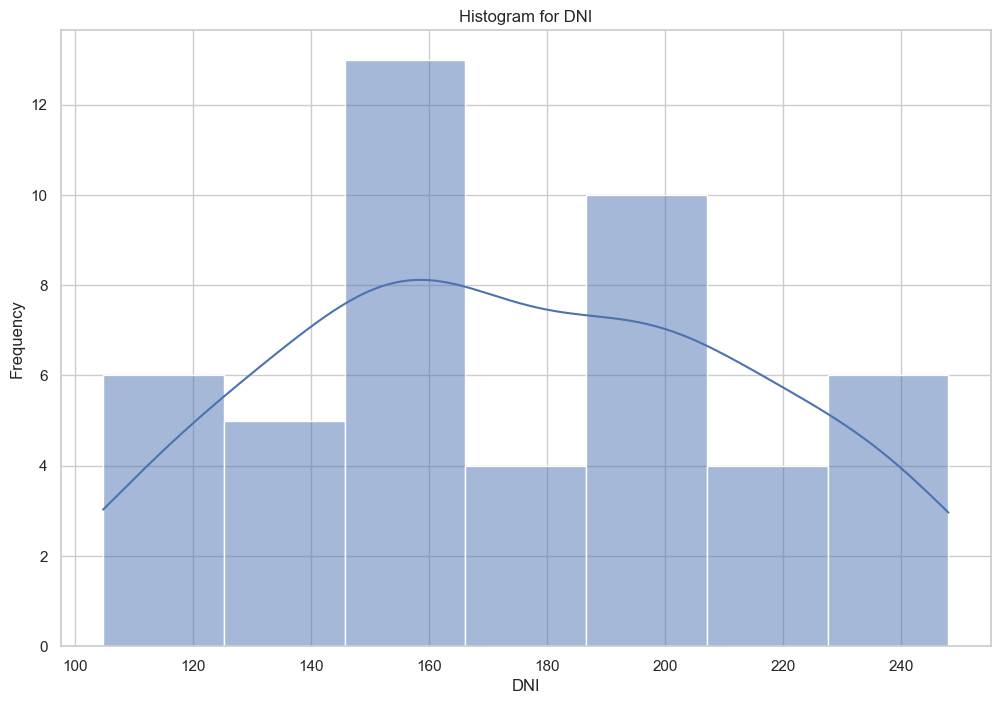

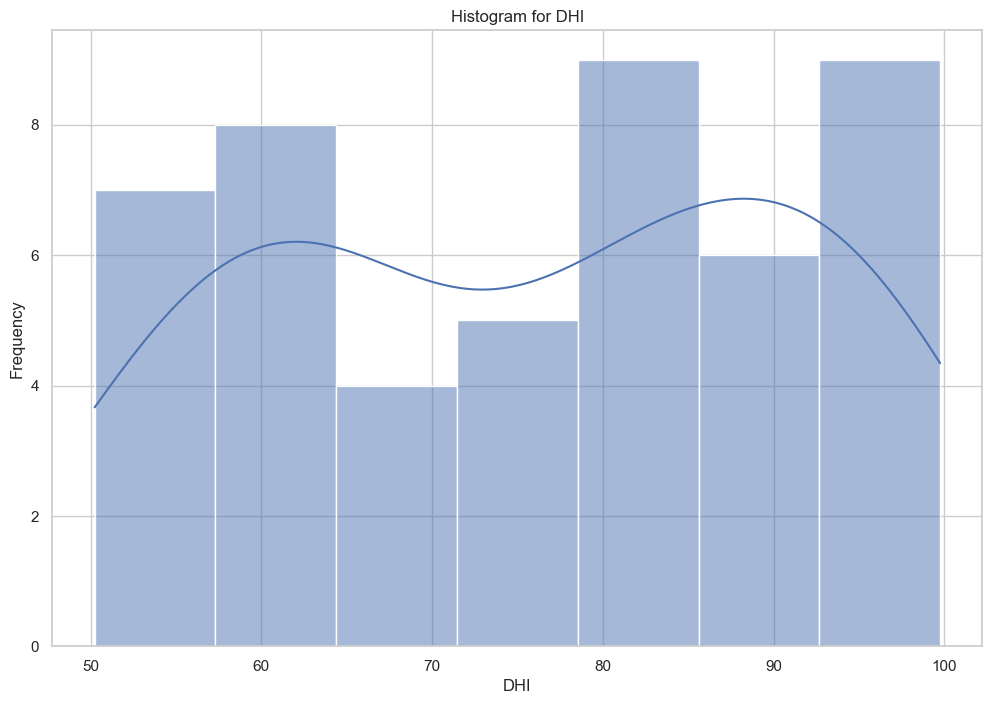

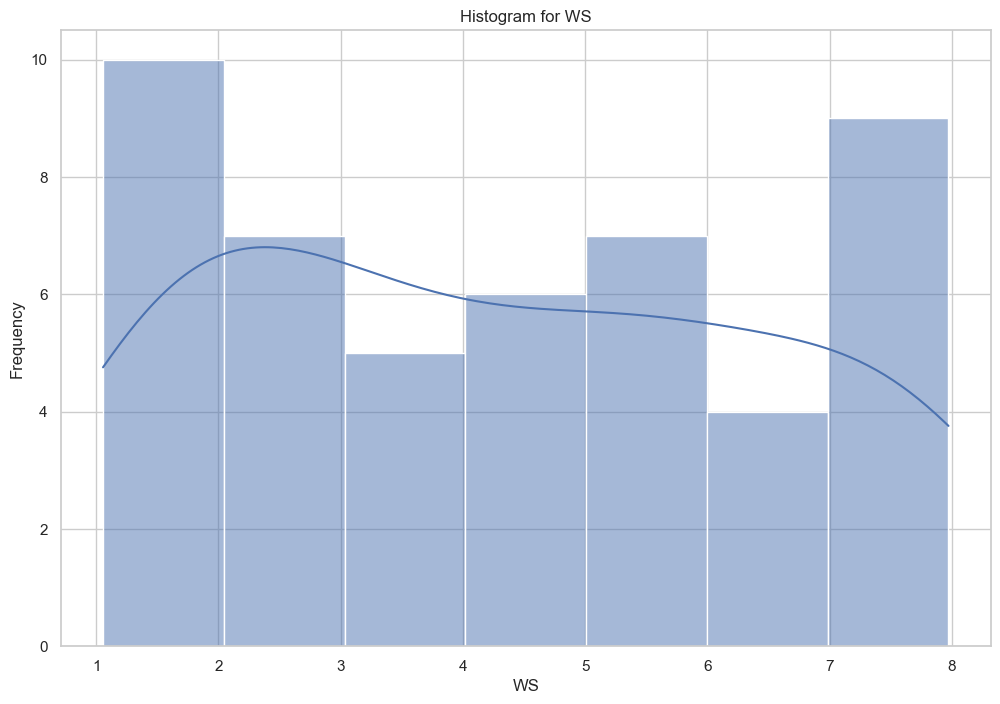

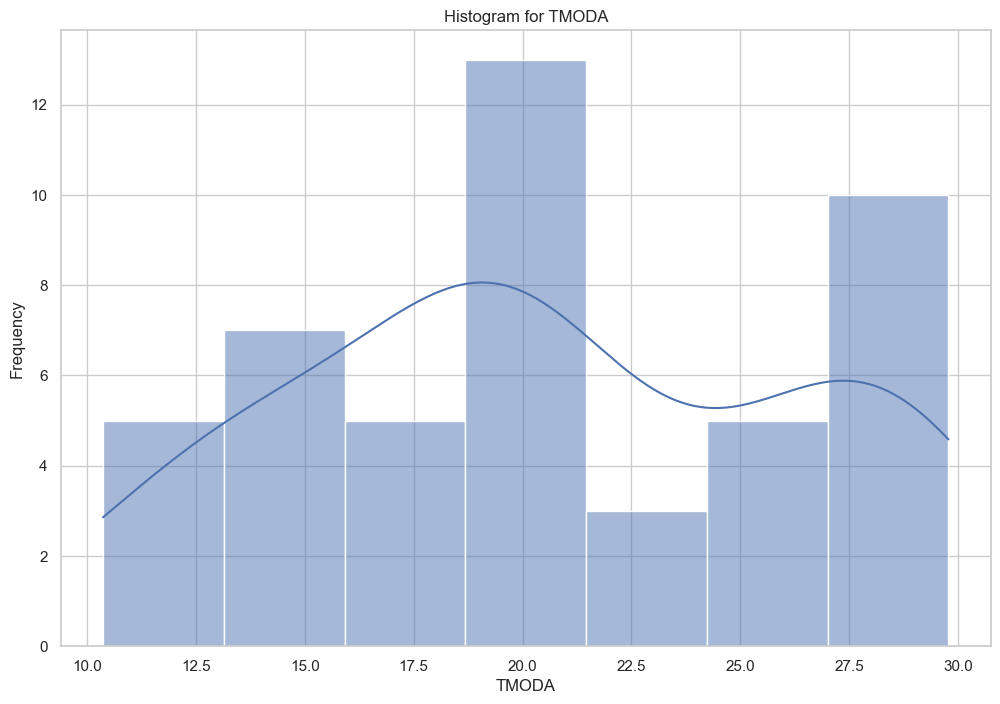

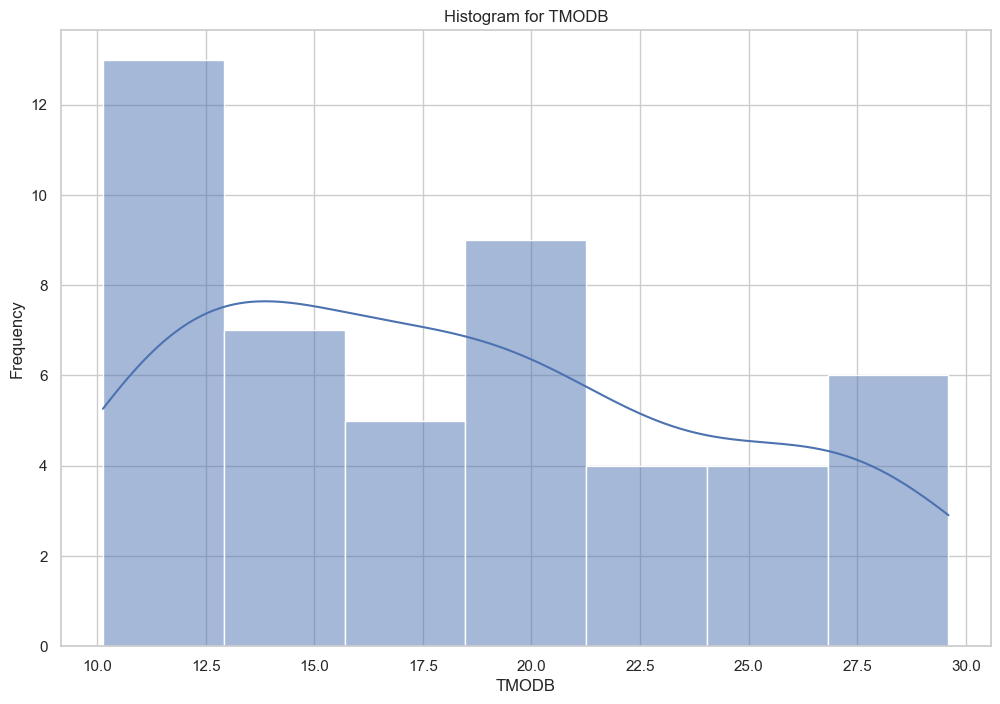

In [71]:
# Plot histograms for GHI, DNI, DHI, WS, and temperatures
# Columns intended for plotting
columns_to_plot = ['ghi', 'dni', 'dhi', 'ws', 'tmoda', 'tmodb']

# Verify if these columns exist in the data
missing_columns = [col for col in columns_to_plot if col not in data.columns]

if missing_columns:
    print("The following columns are missing from the data:", missing_columns)
else:
    # Plot histograms if all columns are verified
    for col in columns_to_plot:
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram for {col.upper()}')
        plt.xlabel(col.upper())
        plt.ylabel('Frequency')
        plt.show()



In [72]:
# Calculate Z-scores
from scipy.stats import zscore

# Ensure column names are lowercase
data.columns = data.columns.str.strip().str.lower()

# Handle Z-score calculation properly while excluding NaN values
data['ghi_zscore'] = zscore(data['ghi'].fillna(0))  # Replace NaN with 0 or appropriate value if necessary
data['dni_zscore'] = zscore(data['dni'].fillna(0))
data['dhi_zscore'] = zscore(data['dhi'].fillna(0))

# Flag outliers based on Z-score threshold |z| > 3
outliers = data[(data['ghi_zscore'].abs() > 3) | 
                (data['dni_zscore'].abs() > 3) | 
                (data['dhi_zscore'].abs() > 3)]

# Print outliers
print("Outliers found:")
print(outliers)



Outliers found:
Empty DataFrame
Columns: [timestamp, ghi, dni, dhi, moda, modb, tamb, rh, ws, wsgust, wsstdev, wd, wdstdev, bp, cleaning, precipitation, tmoda, tmodb, comments, ghi_zscore, dni_zscore, dhi_zscore]
Index: []

[0 rows x 22 columns]


Available columns in the DataFrame:
Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments', 'ghi_zscore', 'dni_zscore', 'dhi_zscore'],
      dtype='object')


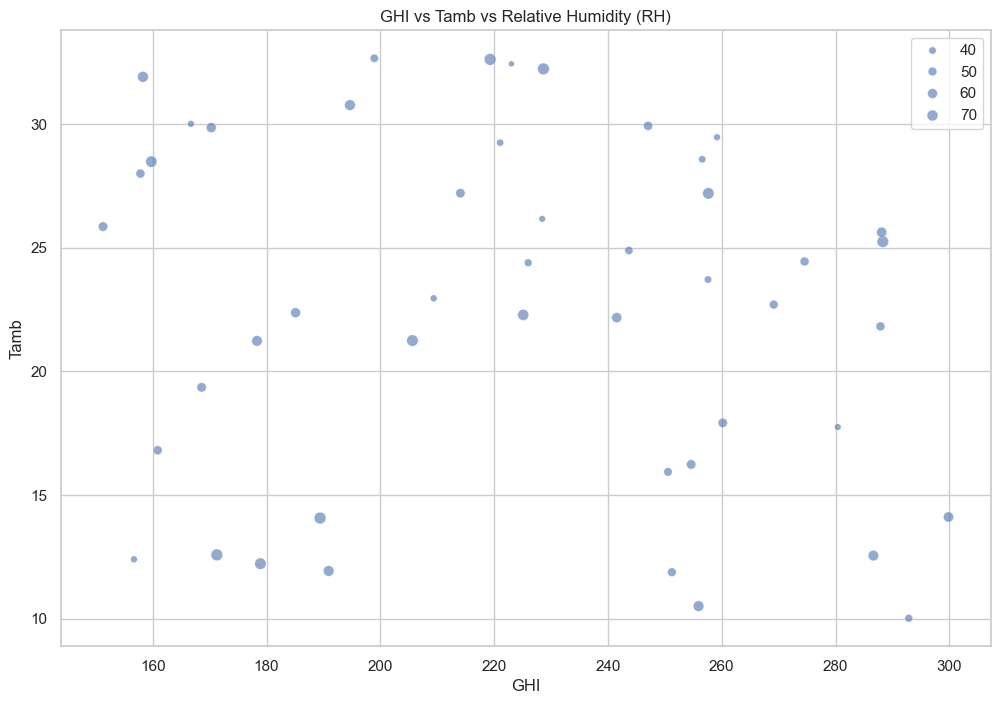

In [73]:
# Create a bubble chart (GHI vs Tamb vs WS with RH or BP as bubble size)
# Normalize column names to ensure consistency
data.columns = data.columns.str.strip().str.lower()

# Debugging: Check available columns
print("Available columns in the DataFrame:")
print(data.columns)

# Check if required columns exist before plotting
required_columns = ['ghi', 'tamb', 'rh']
for col in required_columns:
    if col not in data.columns:
        print(f"Warning: '{col}' is missing in the data. Bubble chart may not plot as expected.")

# Create bubble chart with RH (Relative Humidity) as bubble size
if all(col in data.columns for col in required_columns):
    sns.scatterplot(x='ghi', y='tamb', size='rh', data=data, alpha=0.6)
    plt.title("GHI vs Tamb vs Relative Humidity (RH)")
    plt.xlabel("GHI")
    plt.ylabel("Tamb")
    plt.legend()
    plt.show()
else:
    print("One or more required columns are missing. Cannot plot the bubble chart.")


In [74]:
# Handle missing values and anomalies

# Check if 'comments' column exists before attempting to drop nulls
if 'comments' in data.columns:
    data.dropna(subset=['comments'], inplace=True)
else:
    print("'comments' column does not exist; skipping null drop for comments.")

# Fill other missing values with median values only for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Ensure we only check relevant columns for anomalies or outliers
columns_to_clean = ['ghi', 'dni', 'dhi']  # Ensure these are lowercase or match your normalized DataFrame column names
for col in columns_to_clean:
    if col in data.columns:
        # Filter data to ensure no negative values in key solar radiation columns
        data = data[data[col] >= 0]
    else:
        print(f"'{col}' column not found in the data. Skipping anomaly filtering for it.")

